In [2]:
import pandas as pd
import numpy as np

# Setting tampilan pandas agar semua kolom terlihat rapi
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("--- MEMUAT DAN MENGINSPEKSI KEDALAMAN DATA ---")

try:
    # 1. Load Data
    X_train_sel = pd.read_csv('X_class_train_selected.csv')
    X_train_pca = pd.read_csv('X_class_train_pca.csv')
    y_train = pd.read_csv('y_class_train.csv')
    
    # Load Test Data (untuk kelengkapan inventaris)
    X_test_sel = pd.read_csv('X_class_test_selected.csv')
    X_test_pca = pd.read_csv('X_class_test_pca.csv')
    y_test = pd.read_csv('y_class_test.csv')

    # --- BAGIAN A: INSPEKSI TARGET ---
    print(f"\n[A] TARGET KLASIFIKASI ('Response')")
    print(f"   Tujuan: Memprediksi apakah pelanggan menerima kampanye (1) atau menolak (0).")
    print(f"   Distribusi Kelas (Train):")
    print(y_train['Response'].value_counts(normalize=True).to_frame('Persentase').T)

    # --- BAGIAN B: INSPEKSI FITUR SKENARIO A (LASSO) ---
    print(f"\n[B] FITUR SKENARIO A (LASSO - {X_train_sel.shape[1]} Fitur)")
    print(f"   Karakteristik: Fitur asli terpilih yang paling berpengaruh.")
    print("   -> Statistik Deskriptif (Cek Scaling & Distribusi):")
    # Kita transpose (.T) agar mudah dibaca di laporan
    display(X_train_sel.describe().T[['mean', 'std', 'min', 'max']].round(2))

    # --- BAGIAN C: INSPEKSI FITUR SKENARIO B (PCA) ---
    print(f"\n[C] FITUR SKENARIO B (PCA - {X_train_pca.shape[1]} Fitur)")
    print(f"   Karakteristik: Gabungan Fitur Biner + Komponen Utama (PC) Ortogonal.")
    print("   -> Sampel 5 Baris Data (Melihat Struktur Hybrid):")
    display(X_train_pca.head())

    # Ratakan target untuk modelling selanjutnya
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()

except FileNotFoundError:
    print("Error: File tidak ditemukan.")

--- MEMUAT DAN MENGINSPEKSI KEDALAMAN DATA ---

[A] TARGET KLASIFIKASI ('Response')
   Tujuan: Memprediksi apakah pelanggan menerima kampanye (1) atau menolak (0).
   Distribusi Kelas (Train):
Response           0         1
Persentase  0.851004  0.148996

[B] FITUR SKENARIO A (LASSO - 15 Fitur)
   Karakteristik: Fitur asli terpilih yang paling berpengaruh.
   -> Statistik Deskriptif (Cek Scaling & Distribusi):


,mean,std,min,max
Teenhome,-0.00,1.00,-0.93,2.72
Recency,0.00,1.00,-1.69,1.72
MntWines,-0.00,1.00,-0.90,3.54
MntFruits,-0.00,1.00,-0.66,4.33
MntMeatProducts,0.00,1.00,-0.74,6.96
MntGoldProds,-0.00,1.00,-0.84,6.09
NumWebPurchases,0.00,1.00,-1.46,8.07
NumCatalogPurchases,0.00,1.00,-0.92,8.95
NumStorePurchases,0.00,1.00,-1.77,2.23
NumWebVisitsMonth,0.00,1.00,-2.17,5.96



[C] FITUR SKENARIO B (PCA - 28 Fitur)
   Karakteristik: Gabungan Fitur Biner + Komponen Utama (PC) Ortogonal.
   -> Sampel 5 Baris Data (Melihat Struktur Hybrid):


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Lain-Lain,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,0,0,1,0,0,0,False,False,False,True,False,True,False,False,False,3.549687,-1.032578,-0.311371,0.396045,-1.789133,1.020731,0.089140,-0.555595,0.668741,1.461451,-0.030849,-0.528326,0.553904
1,0,0,1,1,0,0,False,False,False,True,False,False,True,False,False,3.173621,0.696658,-1.268917,-1.175401,-0.132750,1.074751,0.014334,-1.270182,0.728240,-0.364084,1.533353,-0.178690,0.396450
2,0,0,0,0,0,0,False,False,False,False,False,False,True,False,False,-1.895057,0.417886,0.970241,-0.315040,-0.364884,-0.744886,-0.515107,0.624674,-0.136322,0.149284,-0.322762,0.301929,0.198409
3,0,0,0,0,0,0,False,False,True,False,False,False,True,False,False,-0.909579,-0.639749,-0.198045,0.788007,0.707602,0.689173,0.198443,-0.328735,-0.829577,0.142801,0.509049,-0.313382,-0.487275
4,0,0,0,0,0,0,False,False,False,False,False,False,False,True,False,-0.822795,-0.555538,-0.753173,1.365423,1.055350,0.074462,0.259727,-0.965980,-0.737695,-0.244078,0.119939,-0.775621,-0.725822



[1] MEMUAT DATASET DARI PRE-PROCESSING II
[OK] Data Berhasil Dimuat.
   > Shape LASSO (Original): (1792, 15)
   > Shape PCA (Original)  : (1792, 28)
   > Shape Target Train    : (1792,)

[2] MENJALANKAN DEEP DIVE EDA (DATA ASLI)
Tujuan: Membuktikan karakteristik data sebelum disentuh oleh SMOTE.

--- A. Analisis Korelasi: Uji Multikolinearitas ---


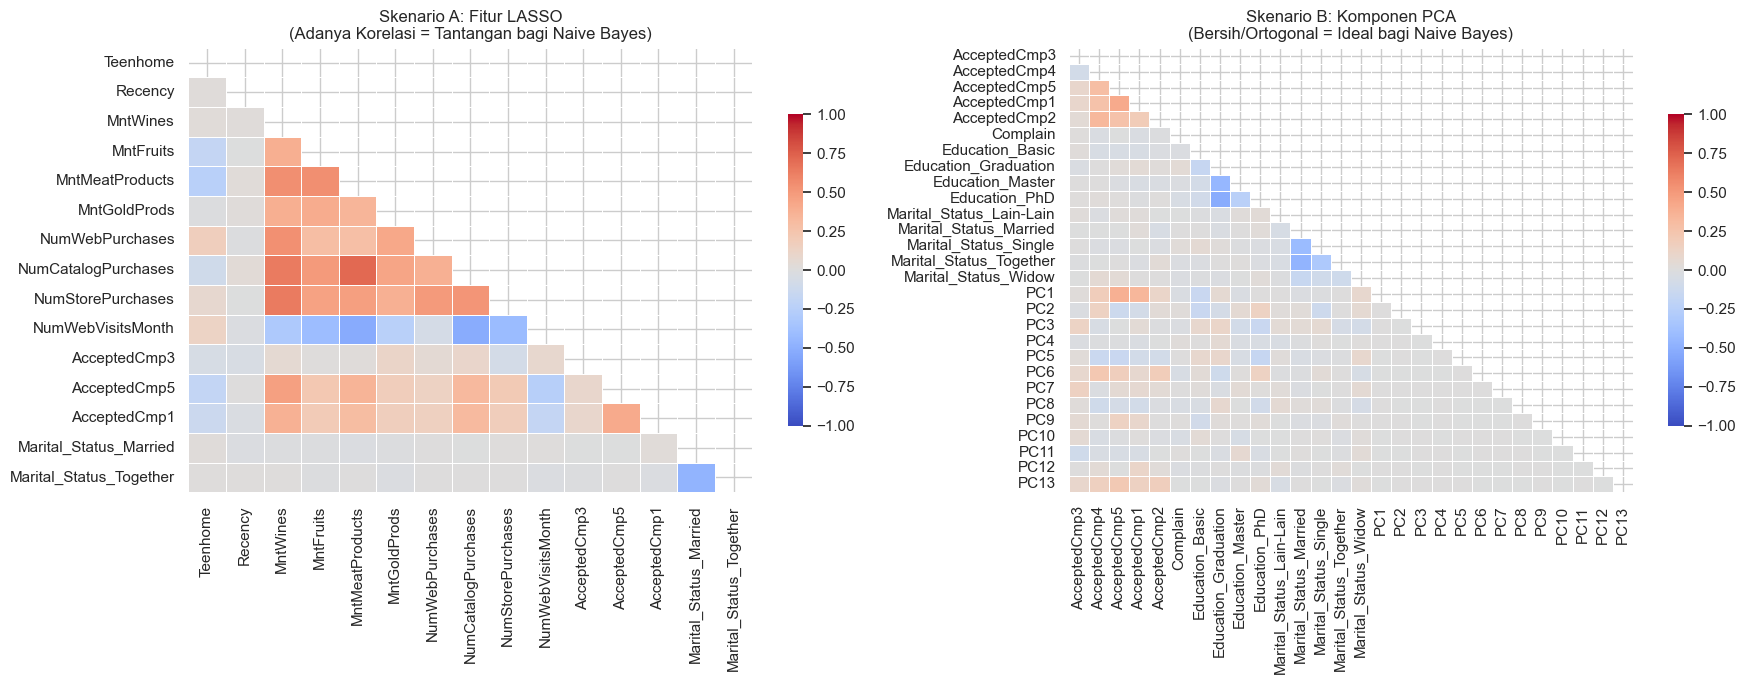


--- B. Analisis Geometri: Proyeksi Ruang Vektor PCA ---


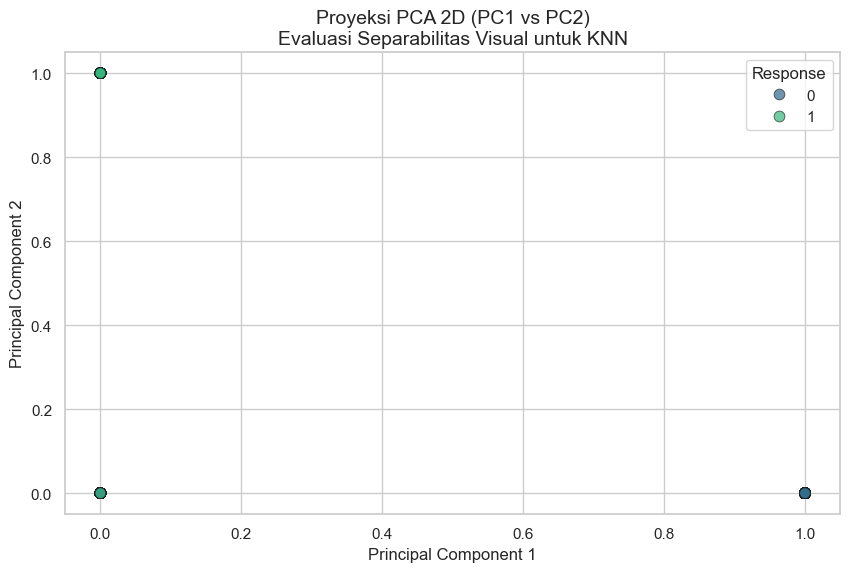


--- C. Analisis Kekuatan Prediktor (Skenario LASSO) ---


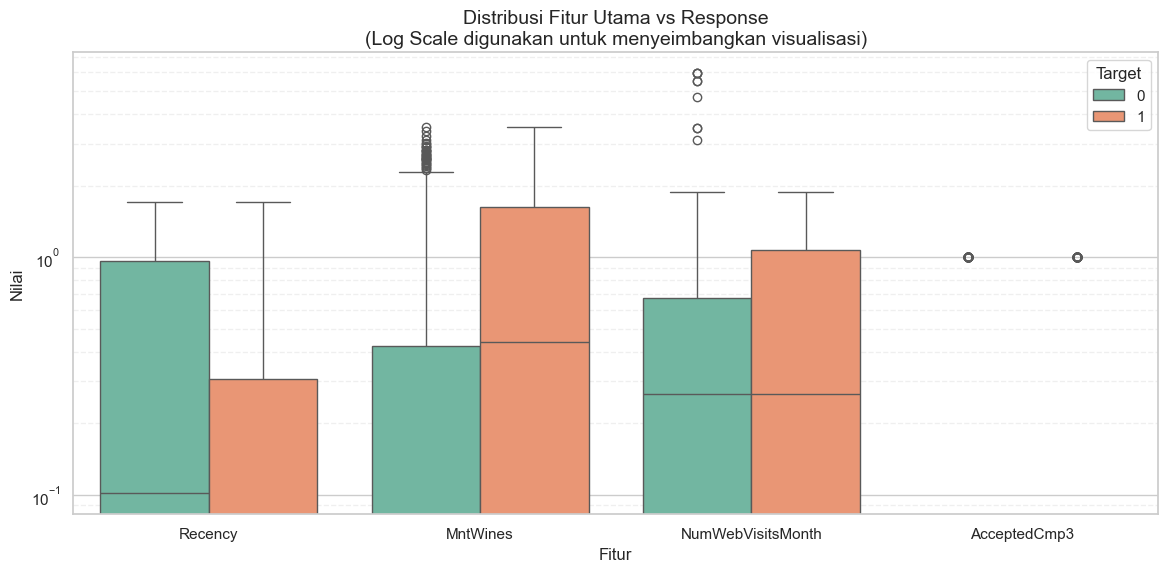


[3] MENERAPKAN SMOTE (RESAMPLING DATA LATIH)
Catatan: SMOTE diterapkan setelah EDA agar kita tidak menganalisis data palsu.

--- 3.1. Processing Skenario A (LASSO) ---


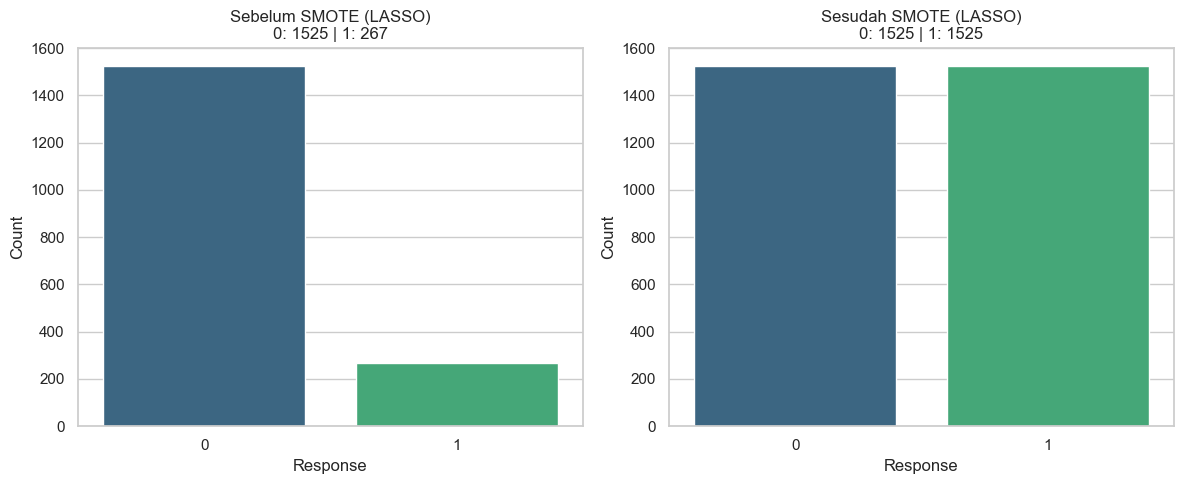


--- 3.2. Processing Skenario B (PCA) ---


  File "C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


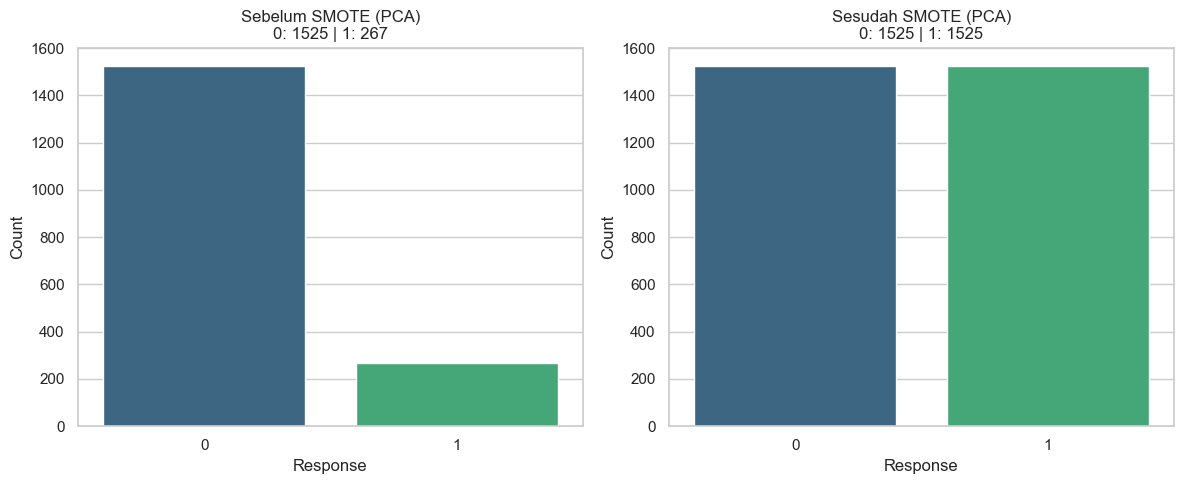


DATA PREPARATION SELESAI
Dataset Final (Balanced) siap untuk Modelling:
1. Train Skenario A (LASSO): (3050, 15) samples
2. Train Skenario B (PCA)  : (3050, 28) samples
3. Test Data (Untouched)   : (448, 15) samples

Lanjut ke Tahap: Modelling (KNN & Naive Bayes).


In [3]:
# INTEGRATED PIPELINE: DATA PREPARATION & ADVANCED EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE 

# Konfigurasi Tampilan Visual Profesional
sns.set(style="whitegrid", context="notebook", palette="muted")
import warnings
warnings.filterwarnings('ignore')

# 1. LOAD DATASET (INPUT)
print("\n" + "="*50)
print("[1] MEMUAT DATASET DARI PRE-PROCESSING II")
print("="*50)

try:
    # A. Load Data Skenario A (Seleksi Fitur/LASSO)
    X_train_sel = pd.read_csv('X_class_train_selected.csv')
    X_test_sel = pd.read_csv('X_class_test_selected.csv')

    # B. Load Data Skenario B (PCA)
    X_train_pca = pd.read_csv('X_class_train_pca.csv')
    X_test_pca = pd.read_csv('X_class_test_pca.csv')

    # C. Load Target (Ratakan jadi array 1D untuk kompatibilitas Scikit-Learn)
    y_train = pd.read_csv('y_class_train.csv').values.ravel()
    y_test = pd.read_csv('y_class_test.csv').values.ravel()

    print(f"[OK] Data Berhasil Dimuat.")
    print(f"   > Shape LASSO (Original): {X_train_sel.shape}")
    print(f"   > Shape PCA (Original)  : {X_train_pca.shape}")
    print(f"   > Shape Target Train    : {y_train.shape}")

except FileNotFoundError:
    print("[ERROR] File tidak ditemukan. Pastikan file CSV berada di direktori yang sama.")

# 2. DEEP DIVE EDA: KOMPARASI LASSO VS PCA
print("\n" + "="*50)
print("[2] MENJALANKAN DEEP DIVE EDA (DATA ASLI)")
print("="*50)
print("Tujuan: Membuktikan karakteristik data sebelum disentuh oleh SMOTE.")

def plot_comprehensive_eda(X_sel, X_pca, y):
    """
    Fungsi visualisasi kompleks untuk membandingkan dua skenario data.
    """
    print("\n--- A. Analisis Korelasi: Uji Multikolinearitas ---")
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # Plot Kiri: Heatmap LASSO
    corr_sel = X_sel.corr()
    mask_sel = np.triu(np.ones_like(corr_sel, dtype=bool)) # Masking segitiga atas
    sns.heatmap(corr_sel, mask=mask_sel, cmap='coolwarm', center=0, vmax=1, vmin=-1,
                linewidths=.5, cbar_kws={"shrink": .7}, ax=axes[0])
    axes[0].set_title('Skenario A: Fitur LASSO\n(Adanya Korelasi = Tantangan bagi Naive Bayes)', fontsize=12)
    
    # Plot Kanan: Heatmap PCA
    corr_pca = X_pca.corr()
    mask_pca = np.triu(np.ones_like(corr_pca, dtype=bool))
    sns.heatmap(corr_pca, mask=mask_pca, cmap='coolwarm', center=0, vmax=1, vmin=-1,
                linewidths=.5, cbar_kws={"shrink": .7}, ax=axes[1])
    axes[1].set_title('Skenario B: Komponen PCA\n(Bersih/Ortogonal = Ideal bagi Naive Bayes)', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    print("\n--- B. Analisis Geometri: Proyeksi Ruang Vektor PCA ---")
    plt.figure(figsize=(10, 6))
    # Visualisasi 2 Principal Components pertama
    sns.scatterplot(x=X_pca.iloc[:, 0], y=X_pca.iloc[:, 1], hue=y, 
                    palette='viridis', alpha=0.7, edgecolor='k', s=60)
    plt.title('Proyeksi PCA 2D (PC1 vs PC2)\nEvaluasi Separabilitas Visual untuk KNN', fontsize=14)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Response', loc='upper right')
    plt.show()

    print("\n--- C. Analisis Kekuatan Prediktor (Skenario LASSO) ---")
    # Fokus pada fitur terpenting sesuai Laporan Pre-processing II
    top_features = ['Recency', 'MntWines', 'NumWebVisitsMonth', 'AcceptedCmp3']
    valid_feats = [f for f in top_features if f in X_sel.columns]
    
    if valid_feats:
        # Menyiapkan data untuk plotting boxplot
        temp_df = X_sel.copy()
        temp_df['Target'] = y
        df_melted = temp_df.melt(id_vars='Target', value_vars=valid_feats, 
                                 var_name='Fitur', value_name='Nilai')
        
        plt.figure(figsize=(14, 6))
        sns.boxplot(x='Fitur', y='Nilai', hue='Target', data=df_melted, palette='Set2')
        plt.title('Distribusi Fitur Utama vs Response\n(Log Scale digunakan untuk menyeimbangkan visualisasi)', fontsize=14)
        plt.yscale('log') # PENTING: Skala Log agar fitur nilai kecil & besar terlihat jelas
        plt.grid(True, which="minor", ls="--", alpha=0.3)
        plt.show()

# Eksekusi Fungsi EDA
plot_comprehensive_eda(X_train_sel, X_train_pca, y_train)

# 3. HANDLING IMBALANCE (PENERAPAN SMOTE)
print("\n" + "="*50)
print("[3] MENERAPKAN SMOTE (RESAMPLING DATA LATIH)")
print("="*50)
print("Catatan: SMOTE diterapkan setelah EDA agar kita tidak menganalisis data palsu.")

def apply_smote_and_plot(X, y, title_suffix):
    """
    Menerapkan SMOTE dan memvisualisasikan perbandingan distribusi kelas.
    """
    # Visualisasi SEBELUM SMOTE
    count_before = np.bincount(y)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=y, palette='viridis')
    plt.title(f'Sebelum SMOTE ({title_suffix})\n0: {count_before[0]} | 1: {count_before[1]}')
    plt.xlabel('Response'); plt.ylabel('Count')
    
    # --- PROSES UTAMA SMOTE ---
    smote = SMOTE(random_state=42)
    X_bal, y_bal = smote.fit_resample(X, y)
    
    # Visualisasi SESUDAH SMOTE
    count_after = np.bincount(y_bal)
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_bal, palette='viridis')
    plt.title(f'Sesudah SMOTE ({title_suffix})\n0: {count_after[0]} | 1: {count_after[1]}')
    plt.xlabel('Response'); plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    return X_bal, y_bal

# Eksekusi SMOTE untuk kedua skenario
print("\n--- 3.1. Processing Skenario A (LASSO) ---")
X_train_sel_bal, y_train_sel_bal = apply_smote_and_plot(X_train_sel, y_train, "LASSO")

print("\n--- 3.2. Processing Skenario B (PCA) ---")
X_train_pca_bal, y_train_pca_bal = apply_smote_and_plot(X_train_pca, y_train, "PCA")

# 4. FINAL OUTPUT SUMMARY
print("\n" + "="*50)
print("DATA PREPARATION SELESAI")
print("="*50)
print("Dataset Final (Balanced) siap untuk Modelling:")
print(f"1. Train Skenario A (LASSO): {X_train_sel_bal.shape} samples")
print(f"2. Train Skenario B (PCA)  : {X_train_pca_bal.shape} samples")
print(f"3. Test Data (Untouched)   : {X_test_sel.shape} samples")
print("\nLanjut ke Tahap: Modelling (KNN & Naive Bayes).")


---> Memulai KNN Optimized: Skenario A (LASSO)
     Sedang mencari parameter terbaik...
     [1] Parameter Terbaik: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
     [2] Best Threshold ditemukan: 0.4770

[Laporan Akhir: KNN - Skenario A (LASSO)]
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       381
           1       0.42      0.69      0.52        67

    accuracy                           0.81       448
   macro avg       0.68      0.76      0.70       448
weighted avg       0.86      0.81      0.83       448



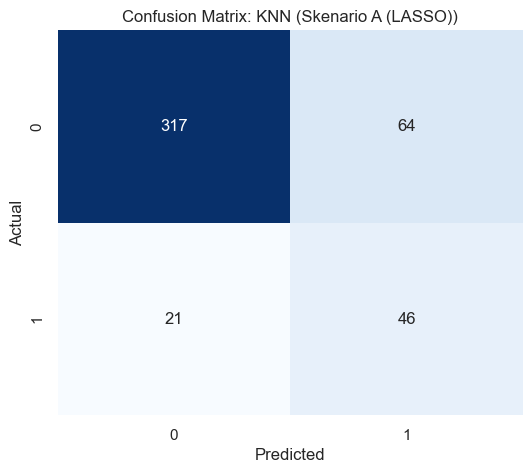


---> Memulai KNN Optimized: Skenario B (PCA)
     Sedang mencari parameter terbaik...
     [1] Parameter Terbaik: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
     [2] Best Threshold ditemukan: 0.7500

[Laporan Akhir: KNN - Skenario B (PCA)]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       381
           1       0.55      0.51      0.53        67

    accuracy                           0.86       448
   macro avg       0.73      0.72      0.72       448
weighted avg       0.86      0.86      0.86       448



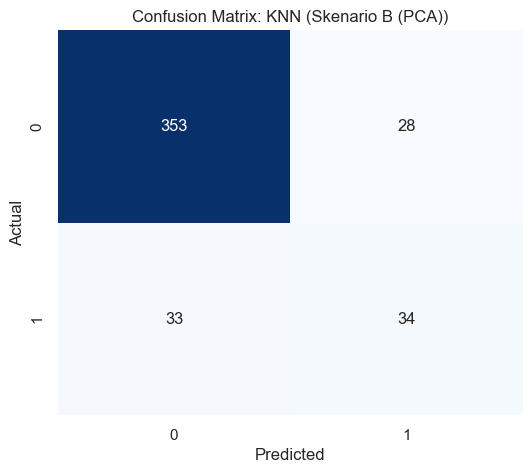

In [4]:
# BABAK 2: MODELLING - K-NEAREST NEIGHBORS (OPTIMIZED)
# Strategi: Menggabungkan GridSearch (Manhattan/Euclidean) + Threshold Tuning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, f1_score

model_results = [] 

def run_knn_optimized(X_train, y_train, X_test, y_test, scenario_name):
    print(f"\n---> Memulai KNN Optimized: {scenario_name}")
    
    # 1. Hyperparameter Tuning Lengkap
    param_grid = {
        'n_neighbors': [3, 4, 5, 6, 7, 9], 
        'weights': ['distance'],  
        'p': [1, 2]               # 1=Manhattan, 2=Euclidean
    }
    
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
    print("     Sedang mencari parameter terbaik...")
    grid.fit(X_train, y_train)
    
    best_knn = grid.best_estimator_
    best_params = grid.best_params_
    print(f"     [1] Parameter Terbaik: {best_params}")
    
    # 2. Threshold Tuning (Agar KNN menangkap lebih banyak target)
    y_proba = best_knn.predict_proba(X_test)[:, 1]
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    best_threshold = thresholds[np.argmax(f1_scores)]
    
    print(f"     [2] Best Threshold ditemukan: {best_threshold:.4f}")
    
    # 3. Prediksi Akhir
    y_pred_optimized = (y_proba >= best_threshold).astype(int)
    
    # 4. Laporan & Visualisasi
    print(f"\n[Laporan Akhir: KNN - {scenario_name}]")
    print(classification_report(y_test, y_pred_optimized))
    
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred_optimized)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: KNN ({scenario_name})')
    plt.xlabel('Predicted'); plt.ylabel('Actual')
    plt.show()
    
    # 5. SIMPAN HASIL 
    recall_class_1 = cm[1,1] / (cm[1,0] + cm[1,1])
    
    model_results.append({
        'Model': 'KNN (Optimized)',
        'Skenario': scenario_name,
        'Accuracy': accuracy_score(y_test, y_pred_optimized),
        'F1-Score': f1_score(y_test, y_pred_optimized),
        'Recall (Target)': recall_class_1,
        'Best Params': str(best_params) + f" | Thresh: {best_threshold:.2f}"
    })

# --- EKSEKUSI ---
run_knn_optimized(X_train_sel_bal, y_train_sel_bal, X_test_sel, y_test, "Skenario A (LASSO)")
run_knn_optimized(X_train_pca_bal, y_train_pca_bal, X_test_pca, y_test, "Skenario B (PCA)")


---> Memulai Eksperimen Naive Bayes: Skenario A (LASSO)
     Sedang mencari smoothing terbaik...


     Parameter Terbaik: {'var_smoothing': np.float64(0.01)}

[Laporan Klasifikasi: Naive Bayes - Skenario A (LASSO)]
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       381
           1       0.34      0.63      0.44        67

    accuracy                           0.76       448
   macro avg       0.63      0.70      0.64       448
weighted avg       0.83      0.76      0.79       448



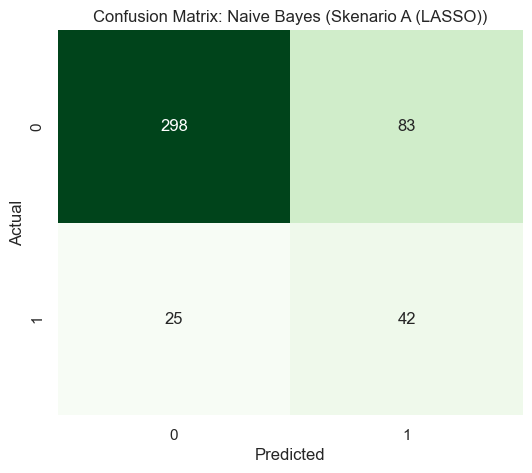


---> Memulai Eksperimen Naive Bayes: Skenario B (PCA)
     Sedang mencari smoothing terbaik...
     Parameter Terbaik: {'var_smoothing': np.float64(0.02848035868435802)}

[Laporan Klasifikasi: Naive Bayes - Skenario B (PCA)]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       381
           1       0.49      0.58      0.53        67

    accuracy                           0.85       448
   macro avg       0.71      0.74      0.72       448
weighted avg       0.86      0.85      0.85       448



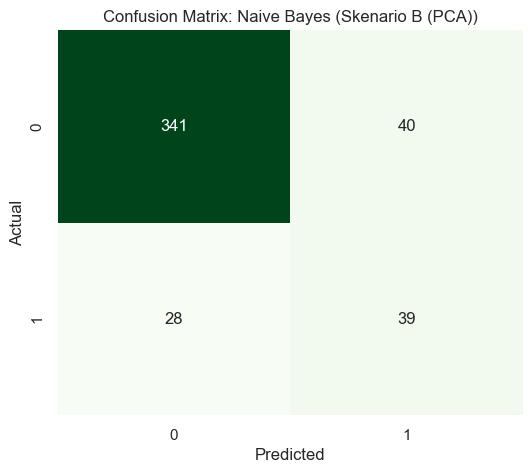

In [5]:
# BABAK 3: MODELLING - NAIVE BAYES (GAUSSIAN NB)
# Strategi: Menguji apakah 'var_smoothing' dapat menstabilkan model dan membuktikan hipotesis bahwa PCA lebih cocok untuk NB daripada LASSO.

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

def run_nb_experiment(X_train, y_train, X_test, y_test, scenario_name):
    print(f"\n---> Memulai Eksperimen Naive Bayes: {scenario_name}")
    
    # 1. Setup Hyperparameter Tuning
    param_grid = {
        'var_smoothing': np.logspace(0, -9, num=100)
    }
    
    # GridSearch (Fokus pada F1-Score agar seimbang)
    grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='f1', n_jobs=-1)
    
    # 2. Training (Fit pada data Balanced SMOTE)
    print("     Sedang mencari smoothing terbaik...")
    grid_search.fit(X_train, y_train)
    
    best_nb = grid_search.best_estimator_
    print(f"     Parameter Terbaik: {grid_search.best_params_}")
    
    # 3. Evaluasi (Predict pada data Test Asli)
    y_pred = best_nb.predict(X_test)
    
    # 4. Laporan & Visualisasi
    print(f"\n[Laporan Klasifikasi: Naive Bayes - {scenario_name}]")
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False) 
    plt.title(f'Confusion Matrix: Naive Bayes ({scenario_name})')
    plt.xlabel('Predicted'); plt.ylabel('Actual')
    plt.show()
    
    # 5. Simpan Hasil ke List Global
    model_results.append({
        'Model': 'Naive Bayes',
        'Skenario': scenario_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Recall (Target)': cm[1,1] / (cm[1,0] + cm[1,1]), # Recall manual kelas 1
        'Best Params': str(grid_search.best_params_)
    })

# --- EKSEKUSI ---

run_nb_experiment(X_train_sel_bal, y_train_sel_bal, X_test_sel, y_test, "Skenario A (LASSO)")
run_nb_experiment(X_train_pca_bal, y_train_pca_bal, X_test_pca, y_test, "Skenario B (PCA)")


=== LEADERBOARD PERFORMA MODEL ===


,Model,Skenario,Accuracy,F1-Score,Recall (Target),Best Params
0,Naive Bayes,Skenario B (PCA),0.848214,0.534247,0.582090,{'var_smoothing': np.float64(0.028480358684358...
1,KNN (Optimized),Skenario B (PCA),0.863839,0.527132,0.507463,"{'n_neighbors': 4, 'p': 1, 'weights': 'distanc..."
2,KNN (Optimized),Skenario A (LASSO),0.810268,0.519774,0.686567,"{'n_neighbors': 4, 'p': 1, 'weights': 'distanc..."
3,Naive Bayes,Skenario A (LASSO),0.758929,0.437500,0.626866,{'var_smoothing': np.float64(0.01)}


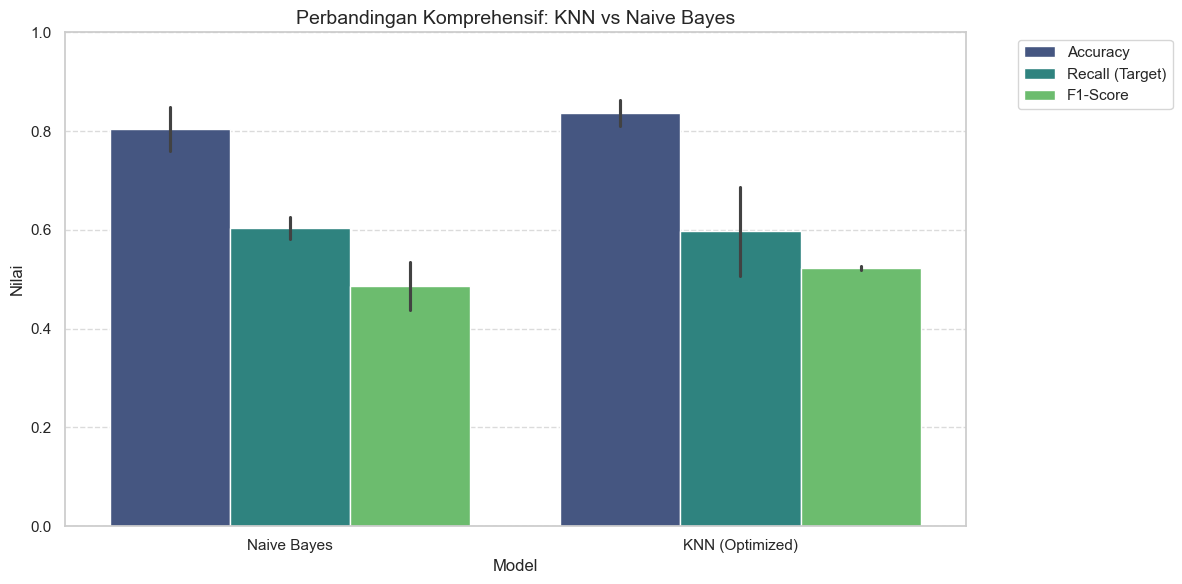


[KESIMPULAN DATA DRIVEN]
Model Paling Seimbang (F1-Score Tertinggi): Naive Bayes pada Skenario B (PCA)
Skor F1: 0.5342
--> Gunakan model ini jika ingin keseimbangan antara menangkap target dan hemat biaya.


In [6]:
# BABAK FINAL: REKAPITULASI & PERBANDINGAN MODEL
# Tujuan: Membandingkan semua eksperimen (KNN & NB) dalam satu tabel.

# 1. Buat DataFrame dari list hasil yang sudah kita kumpulkan
df_results = pd.DataFrame(model_results)

# 2. Urutkan berdasarkan F1-Score (Metrik penyeimbang terbaik)
df_results = df_results.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

# 3. Tampilkan Tabel
print("\n=== LEADERBOARD PERFORMA MODEL ===")
display(df_results)

# 4. Visualisasi Perbandingan (Bar Chart)
plt.figure(figsize=(12, 6))

# Melt dataframe agar mudah di-plot side-by-side
df_melt = df_results.melt(id_vars=['Model', 'Skenario'], 
                          value_vars=['Accuracy', 'Recall (Target)', 'F1-Score'],
                          var_name='Metrik', value_name='Nilai')

sns.barplot(x='Model', y='Nilai', hue='Metrik', data=df_melt, palette='viridis')
plt.title('Perbandingan Komprehensif: KNN vs Naive Bayes', fontsize=14)
plt.ylim(0, 1.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Kesimpulan Otomatis
best_model = df_results.iloc[0]
print(f"\n[KESIMPULAN DATA DRIVEN]")
print(f"Model Paling Seimbang (F1-Score Tertinggi): {best_model['Model']} pada {best_model['Skenario']}")
print(f"Skor F1: {best_model['F1-Score']:.4f}")
print("--> Gunakan model ini jika ingin keseimbangan antara menangkap target dan hemat biaya.")